## **<center>D212 OFM3  TASK 2: DIMENSIONALITY REDUCTION<center>** 

Julia Amanda Terzin  
ID:009968680  
Mentor: Linda Howel   
1-385-428-2729    
linda.howell@wgu.edu   
August 11, 2022

### Part I: Research Question

#### A. Describe the purpose of this data mining report by doing the following:

#### A.1. Propose one question relevant to a real-world organizational situation that you will answer by using principal component analysis (PCA).

Can we use PCA to reduce the dimensionality of our data and still capture most of the variance?

#### A.2. Define one goal of the data analysis. Ensure that your goal is reasonable within the scope of the scenario and is represented in the available data.

The goal of this analysis is to use PCA to reduce the dimensionality of our dataset while capturing most of the variance. The principal components identified can then be used to facilitate further analysis of our medical data to identify patterns of patients who are likely to be readmitted.

### Part II: Technique Justification

#### B. Explain the reasons for using PCA by doing the following:

#### B.1. Explain how PCA analyzes the selected data set. Include expected outcomes.

PCA transforms variables by creating linear combinations of the original variables that capture the most variance possible.  The new variables, principal components (PCs), are a smaller set of uncorrelated variables. The PCs are generated in descending order by captured variance.  (Bruce, 2020) The first step after standardizing the data is to use sklearn’s PCA function to generate all the PCs. The next step is to determine how many PCs to keep.  The Kaiser Criteria states that only PCs with an eigenvalue greater than 1 should be used.  A scree plot of the eigenvalues and PCs will be used to determine the cutoff point. Finally, the total variance captured by the retained PCs will be computed.  The expected outcome is that the analysis reduces the dimensionality of the dataset while capturing most of the variance.

#### B.2. Summarize one assumption of PCA.

One assumption of PCA is that the data is normalized. Because PCA measures the variance of the variables, it is sensitive to scale. Standardizing the variance of the variables gives equal weight to them. (Avcontentteam, 2020)

### Part III: Data Preparation

#### C. Perform data preparation for the chosen dataset by doing the following

#### C.1. Identify the continuous dataset variables that you will need in order to answer the PCA question proposed in part A1.

|  Name | Description|  #Unique | Example/Range  |
|:---|:---|---:|---:|
|Age|Age of patent|72|18-89|
|VitD_levels|Lab value for Vitamin D level|10,000|9.519012-53.019124|
|Doc_visits  |Primary care doctor's visits to patient during initial admission|9|1-9|
|Full_meals_eaten|Total number of full meals eaten during hospitalization. Initial verses readmission not specified. Partial meals recorded as 0, more than 3 meals were given if requested|8|0-7|
|VitD_supp|Number of vitamin D supplements given. Initial verses readmission not specified|6|0-5|
|Initial_days|Length of initial hospital stay|9,926| 1.001981- 71.981486|
|TotalCharge|Average daily charge. Total Amount/# of days. Does not include specialized treatments. Initial verses readmission not specified|10,000|1,256.751699- 2,1524.224210|
|Additional_charges|Average amount charged for "miscellaneous procedures, treatments, medicines, anesthesiology, etc". Initial verses readmission not specified|8,888|3,125.702716- 3,0566.073130|

##### Import Packages

In [1]:
import pandas as pd
import numpy as np
from feature_engine.outliers import OutlierTrimmer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

In [2]:
## Versions
print(pd.__version__)
print(np.__version__)

1.2.5
1.20.1


In [3]:
warnings.filterwarnings('ignore')

##### Functions

In [4]:
# Funtion for finding upper and lower outliers
#Returns df with outliers dropped
def out(df):

 # List of numbers columns
 num_cols = df.select_dtypes(include='number').columns
 
 #Find upper and lower outliers
 for col in num_cols:
     capper = OutlierTrimmer(capping_method='iqr', tail='both', fold=1.5,
     variables=[col])
     capper.fit(df)
     upper = capper.right_tail_caps_
     lower = capper.left_tail_caps_ 
 
     print(capper.right_tail_caps_)
     print(capper.left_tail_caps_)
     capped = capper.transform(df)
 
 return capped


##### Load Data

In [5]:
df = pd.read_csv('c:/Users/jater/Downloads/D205/medical_clean212.csv')

In [6]:
df_copy = df.copy(deep=True)

##### Explore Data

In [7]:
df.shape

(10000, 50)

In [8]:
df.info() #Column names, data types, non-nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [9]:
df.isnull().sum() 

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe().transpose() #Numeric values- count, min, max, mean

,count,mean,std,min,25%,50%,75%,max
CaseOrder,10000.0,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.000000
Zip,10000.0,50159.323900,27469.588208,610.000000,27592.000000,50207.000000,72411.750000,99929.000000
Lat,10000.0,38.751099,5.403085,17.967190,35.255120,39.419355,42.044175,70.560990
Lng,10000.0,-91.243080,15.205998,-174.209700,-97.352982,-88.397230,-80.438050,-65.290170
Population,10000.0,9965.253800,14824.758614,0.000000,694.750000,2769.000000,13945.000000,122814.000000
Children,10000.0,2.097200,2.163659,0.000000,0.000000,1.000000,3.000000,10.000000
Age,10000.0,53.511700,20.638538,18.000000,36.000000,53.000000,71.000000,89.000000
Income,10000.0,40490.495160,28521.153293,154.080000,19598.775000,33768.420000,54296.402500,207249.100000
VitD_levels,10000.0,17.964262,2.017231,9.806483,16.626439,17.951122,19.347963,26.394449
Doc_visits,10000.0,5.012200,1.045734,1.000000,4.000000,5.000000,6.000000,9.000000


In [12]:
df.describe(exclude='number').transpose() #Non-numeric values- count, #unique, most frequent

,count,unique,top,freq
Customer_id,10000,10000,Y835158,1
Interaction,10000,10000,e4868ade-f3d9-4097-8d83-ccba8aa527a4,1
UID,10000,10000,aeb3b0b3c2e965c2b0523f726aab2f66,1
City,10000,6072,Houston,36
State,10000,52,TX,553
County,10000,1607,Jefferson,118
Area,10000,3,Rural,3369
TimeZone,10000,26,America/New_York,3889
Job,10000,639,Outdoor activities/education manager,29
Marital,10000,5,Widowed,2045


In [13]:
pd.set_option('display.max_columns', None)
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [14]:
df.set_index('CaseOrder', drop = True, inplace = True)  #set index

In [15]:
df.columns

Index(['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip',
       'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children',
       'Age', 'Income', 'Marital', 'Gender', 'ReAdmis', 'VitD_levels',
       'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink',
       'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Services', 'Initial_days', 'TotalCharge', 'Additional_charges',
       'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [16]:
df = df.drop(['Customer_id','Interaction','UID','City','State','County','Zip','Lat','Lng',
              'Population','Area','TimeZone','Job','Children', 'Income','Marital','Gender', 'ReAdmis','Soft_drink','Initial_admin','HighBlood', 'Stroke', 
              'Complication_risk','Overweight', 'Arthritis', 'Diabetes','Hyperlipidemia','BackPain',
              'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma','Services', 'Item1',
              'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis=1) 

In [17]:
df.head()

,Age,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges
CaseOrder,,,,,,,,
1,53,19.141466,6,0,0,10.585770,3726.702860,17939.403420
2,51,18.940352,4,2,1,15.129562,4193.190458,17612.998120
3,53,18.057507,4,1,0,4.772177,2434.234222,17505.192460
4,78,16.576858,4,1,0,1.714879,2127.830423,12993.437350
5,22,17.439069,5,0,2,1.254807,2113.073274,3716.525786


##### Outliers

In [18]:
#Find upper and lower limits for outliers and return df with outlier rows
#Return df with outliners dropped as capped
capped= out(df)

{'Age': 123.5}
{'Age': -16.5}
{'VitD_levels': 23.430248331250006}
{'VitD_levels': 12.544152781249997}
{'Doc_visits': 9.0}
{'Doc_visits': 1.0}
{'Full_meals_eaten': 5.0}
{'Full_meals_eaten': -3.0}
{'vitD_supp': 2.5}
{'vitD_supp': -1.5}
{'Initial_days': 141.058227953}
{'Initial_days': -72.000993255}
{'TotalCharge': 13880.1883525}
{'TotalCharge': -3241.1145874999993}
{'Additional_charges': 27086.4933675}
{'Additional_charges': -3473.5156124999994}


In [19]:
# df without outliers
capped.describe()

,Age,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges
count,9576.000000,9576.000000,9576.000000,9576.000000,9576.000000,9576.000000,9576.000000,9576.000000
mean,52.097222,17.962751,5.010547,1.000627,0.396094,34.473225,5308.332913,12252.918742
std,19.933929,2.016336,1.045389,1.008786,0.627367,26.286205,2177.431853,5806.643124
min,18.000000,9.806483,1.000000,0.000000,0.000000,1.001981,1938.312067,3125.703000
25%,35.000000,16.629871,4.000000,0.000000,0.000000,7.933317,3180.581785,7843.023227
50%,52.000000,17.946174,5.000000,1.000000,0.000000,36.215360,5218.153500,11302.041845
75%,69.000000,19.340687,6.000000,2.000000,1.000000,61.130435,7452.330000,14823.206205
max,89.000000,26.394449,9.000000,7.000000,5.000000,71.981490,9180.728000,27059.629700


In [20]:
# Examine rows dropped for outliers
outliers = df[~df.index.isin(capped.index)]
outliers

,Age,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges
CaseOrder,,,,,,,,
21,86,19.374983,6,2,2,7.094503,3534.815016,28788.08031
82,86,14.573324,5,2,1,8.652246,2846.148825,28102.95750
102,84,19.687260,3,1,0,2.161241,3130.594194,28297.97033
103,89,17.898182,3,1,1,9.779207,2977.031420,29021.25261
115,89,17.084329,6,0,0,4.337468,2588.662209,28830.32716
...,...,...,...,...,...,...,...,...
9803,88,19.392970,4,0,0,63.923510,7266.345000,28632.32000
9851,82,18.715900,4,0,1,66.986960,8135.521000,27209.89000
9867,83,20.385230,6,0,1,64.878830,8389.962000,27861.36000


In [21]:
features = capped.copy(deep=True)

##### Visualizations

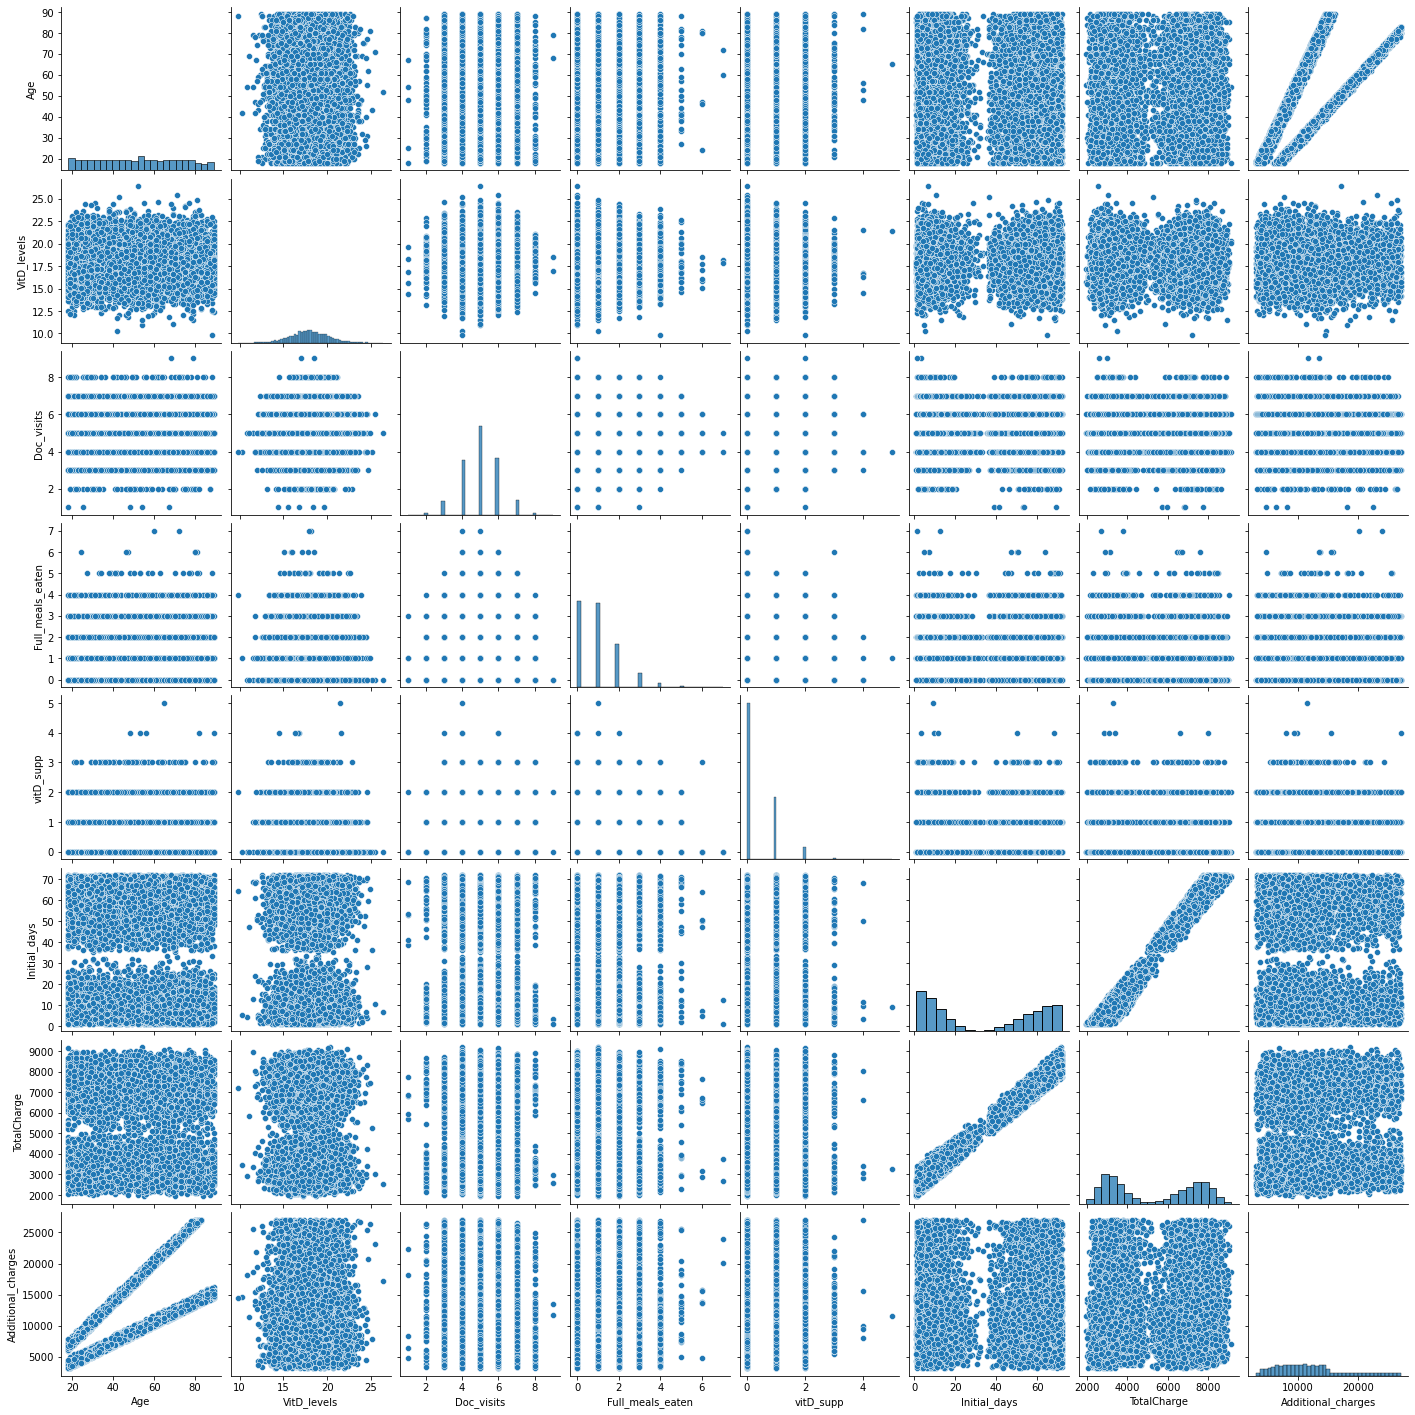

In [22]:
sns.pairplot(features)

#### C.2. Standardize the continuous dataset variables identified in part C1. Include a copy of the cleaned dataset.

In [23]:
features_col = features.columns
features_col

Index(['Age', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Initial_days', 'TotalCharge', 'Additional_charges'],
      dtype='object')

In [24]:
scaler =StandardScaler()
features_std = scaler.fit_transform(features)
print(features_std)

[[ 0.04529087  0.58461301  0.94654145 ... -0.90879236 -0.72641201
   0.97935787]
 [-0.05504582  0.48486581 -0.96672102 ... -0.7359249  -0.5121633
   0.92314254]
 [ 0.04529087  0.04699688 -0.96672102 ... -1.12996906 -1.32001778
   0.90457565]
 ...
 [-0.3560559  -0.41348473 -0.96672102 ...  1.35747316  1.36321285
   0.52154908]
 [-0.45639259  0.96599999 -0.01008978 ...  1.09887231  1.07294842
  -0.77006183]
 [ 0.89815274  0.21122044 -0.01008978 ...  1.3839679   1.18458576
  -0.10501086]]


In [25]:
print('mean: ', features_std.mean(axis=0).round(2))
print('std: ', features_std.std(axis=0).round(2))

mean:  [ 0. -0. -0.  0.  0.  0.  0.  0.]
std:  [1. 1. 1. 1. 1. 1. 1. 1.]


In [26]:
data = pd.DataFrame(features_std, index=features.index,columns=features_col)
data.head()

,Age,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges
CaseOrder,,,,,,,,
1,0.045291,0.584613,0.946541,-0.991963,-0.631393,-0.908792,-0.726412,0.979358
2,-0.055046,0.484866,-0.966721,0.990721,0.962654,-0.735925,-0.512163,0.923143
3,0.045291,0.046997,-0.966721,-0.000621,-0.631393,-1.129969,-1.320018,0.904576
4,1.299500,-0.687368,-0.966721,-0.000621,-0.631393,-1.246283,-1.460743,0.127536
5,-1.509928,-0.259733,-0.010090,-0.991963,2.556702,-1.263787,-1.467521,-1.470185


In [27]:
data.to_csv('D212Task2clean.csv')

### Part IV: Analysis

#### D. Perform PCA by doing the following:

#### D.1. Determine the matrix of all the principal components.

In [28]:
pca_8 = PCA(n_components=8, random_state = 0)
pc_8 = pca_8.fit_transform(features_std)
print(pc_8)

[[-1.0680839   0.83662013  0.17460595 ... -0.82683899 -0.67717792
   0.09758887]
 [-0.79725766  0.73791256 -0.47855832 ...  0.16008162 -0.69109169
   0.12444529]
 [-1.65467781  0.84713292 -0.45518442 ... -0.47277434 -0.60140412
  -0.16192832]
 ...
 [ 1.89494639 -0.07918154 -0.95765472 ...  0.57036698 -0.6035591
  -0.02139018]
 [ 1.43537817 -0.97931418 -0.68155841 ...  0.24403093  0.2297637
  -0.00757353]
 [ 1.90905421  0.32441248  1.01538783 ... -0.68989999  0.69962507
  -0.1141319 ]]


In [29]:
df_pc_8 = pd.DataFrame(pc_8, columns= ['PC1','PC2','PC3','PC4', 'PC5','PC6','PC7','PC8'])
df_pc_8

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-1.068084,0.836620,0.174606,-0.895185,-1.053943,-0.826839,-0.677178,0.097589
1,-0.797258,0.737913,-0.478558,0.309052,1.647303,0.160082,-0.691092,0.124445
2,-1.654678,0.847133,-0.455184,0.947673,-0.052033,-0.472774,-0.601404,-0.161928
3,-1.800553,1.187888,-0.043728,1.325171,-0.266210,-0.041552,0.836227,-0.121287
4,-2.072060,-1.924818,2.142601,-0.565305,1.674794,-0.217291,-0.044438,-0.132609
...,...,...,...,...,...,...,...,...
9571,0.337341,0.486572,2.237877,0.479837,1.902690,-0.300736,0.604319,0.028701
9572,0.811676,-1.450144,-0.072054,0.765605,1.362985,0.818375,-0.547110,0.026115
9573,1.894946,-0.079182,-0.957655,1.171537,0.093929,0.570367,-0.603559,-0.021390
9574,1.435378,-0.979314,-0.681558,-0.750381,1.357261,0.244031,0.229764,-0.007574


In [30]:
loadings = pd.DataFrame(pca_8.components_.T,
                       columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'],
                       index=features.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Age,0.077967,0.702084,0.025873,0.012201,-0.008730,-0.017430,0.706529,0.024873
VitD_levels,0.002802,0.018984,-0.524623,-0.508871,0.289241,-0.617886,-0.002791,-0.001513
Doc_visits,-0.006739,0.011917,0.153927,-0.820339,-0.429913,0.343999,0.000640,-0.000998
Full_meals_eaten,-0.019835,0.034545,-0.637342,0.000450,0.328854,0.695633,0.012470,-0.001532
vitD_supp,0.023746,-0.001672,0.541577,-0.260234,0.789307,0.124047,-0.003467,-0.000494
Initial_days,0.702034,-0.081805,-0.017525,0.001062,-0.010982,0.011130,0.029450,-0.706425
TotalCharge,0.702770,-0.073622,-0.019676,-0.001105,-0.009786,0.012358,-0.028345,0.706579
Additional_charges,0.078569,0.702330,0.014240,0.014844,-0.008399,-0.003041,-0.706379,-0.032947


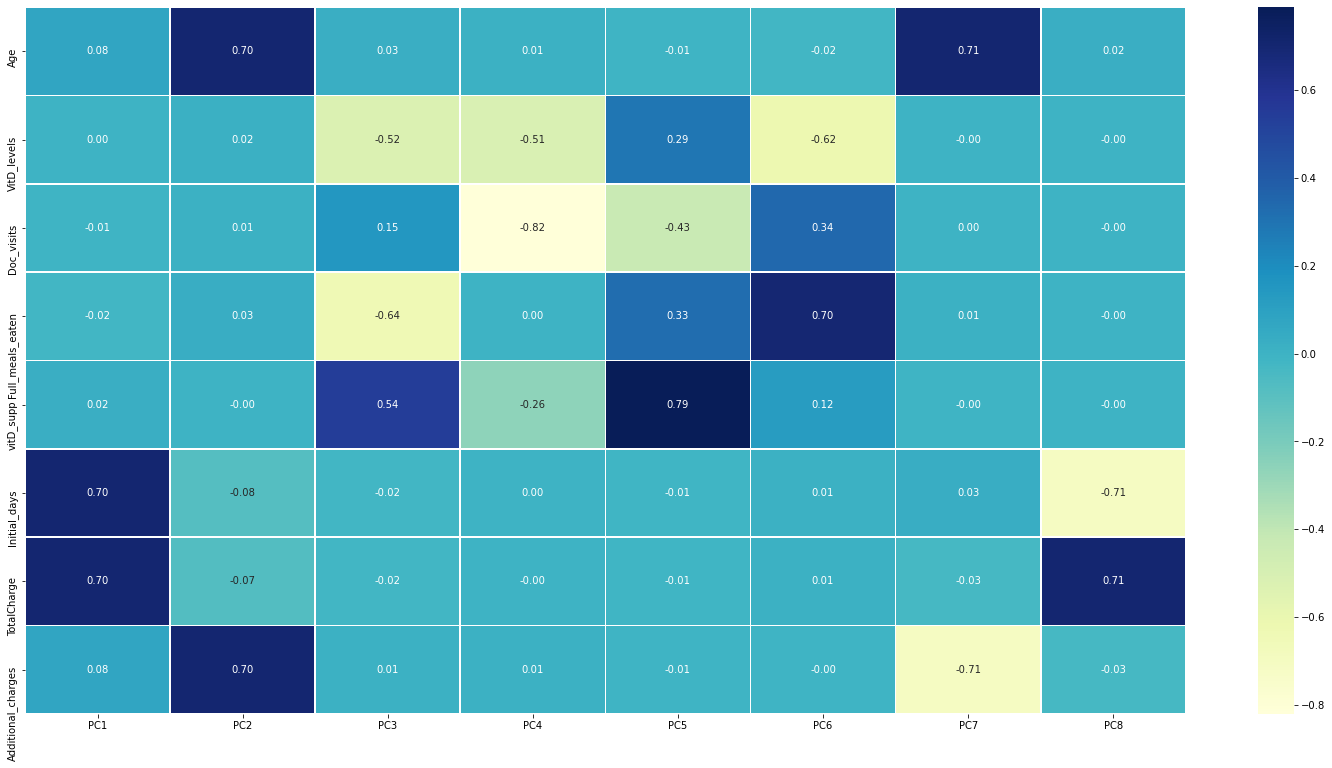

In [31]:
#Visualize loadings https://towardsdatascience.com/principal-component-analysis-algorithm-in-real-life-discovering-patterns-in-a-real-estate-dataset-18134c57ffe7
fig, ax = plt.subplots(figsize=(26, 13))
sns.heatmap(loadings, cmap='YlGnBu', linewidths=.7, annot=True, fmt='.2f')
plt.show()

#### D.2. Identify the total number of principal components using the elbow rule or the Kaiser criterion. Include a screenshot of the scree plot.

**Kaiser criterion**

In [32]:
#https://cgp-oex.wgu.edu/courses/course-v1:WGUx+OEX0026+v02/coursewar
cov_matrix = np.dot(features_std.T, features_std)/features.shape[0] 
eigenvalues = [np.dot(eiganvector.T, np.dot(cov_matrix,eiganvector)) for eiganvector in pca_8.components_]

In [33]:
eigenvalues

[1.9927006299069383,
 1.6733714477127712,
 1.0372110869967797,
 1.0087558098126896,
 0.9813656533202717,
 0.9706825377465557,
 0.32417829044636426,
 0.011734544057631052]

<function matplotlib.pyplot.show(close=None, block=None)>

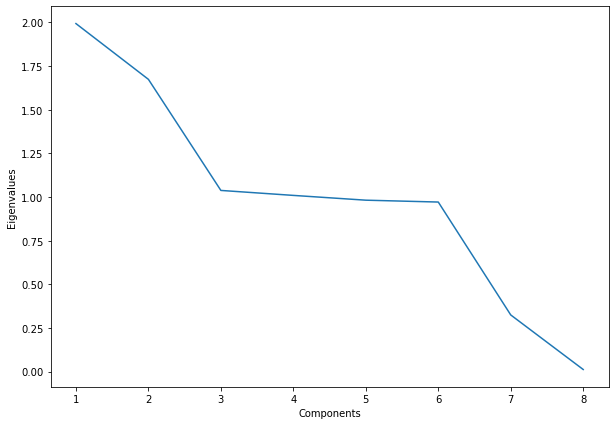

In [34]:
fig = plt.figure(figsize = (10,7))
pcs=np.arange(len(eigenvalues)) + 1
plt.plot(pcs,eigenvalues)
plt.xlabel('Components')
plt.ylabel('Eigenvalues')
plt.show

The Kaiser criterion states that only the principal components with an eigenvalue greater than 1 should be kept. (Bento, 2020) There are 4 PCs with eigenvalues > 1, PC1-4.

In [35]:
pca_4 = PCA(n_components=4, random_state = 0)
pc_4 = pca_4.fit_transform(features_std)
eigen = pca_4.explained_variance_
eigen_df = pd.DataFrame(eigen.round(4),
                       columns=['Eigen per pc'],
                       index=['PC1','PC2','PC3','PC4'])
eigen_df  

,Eigen per pc
PC1,1.9929
PC2,1.6735
PC3,1.0373
PC4,1.0089


#### D.3. Identify the variance of each of the principal components identified in part D2.

In [37]:
var_4 = pca_4.explained_variance_ratio_*100
var_4_df = pd.DataFrame(var_4.round(2),
                       columns=['Variance per PC'],
                       index=['PC1','PC2','PC3','PC4'])
var_4_df 

,Variance per PC
PC1,24.91
PC2,20.92
PC3,12.97
PC4,12.61


#### D.4. Identify the total variance captured by the principal components identified in part D2.

In [38]:
total = var_4_df['Variance per PC'].sum()
print('The total variance captured by the principal components is ', total,'%' )

The total variance captured by the principal components is  71.41 %


#### D.5. Summarize the results of your data analysis.

Using the 4 principal components identified by the Kaiser Criteria, 71.41% of the variance is captured.  This reduces the number of variables to 4 from the original 8.  These 4 PCs can be used to model the data to reduce complexity and avoid overfitting. (Li, 2019)

In [39]:
loadings_4 = pd.DataFrame(pca_4.components_.T,
                       columns=['PC1','PC2','PC3','PC4'],
                       index=features.columns)
loadings_4

,PC1,PC2,PC3,PC4
Age,0.077967,0.702084,0.025873,0.012201
VitD_levels,0.002802,0.018984,-0.524623,-0.508871
Doc_visits,-0.006739,0.011917,0.153927,-0.820339
Full_meals_eaten,-0.019835,0.034545,-0.637342,0.000450
vitD_supp,0.023746,-0.001672,0.541577,-0.260234
Initial_days,0.702034,-0.081805,-0.017525,0.001062
TotalCharge,0.702770,-0.073622,-0.019676,-0.001105
Additional_charges,0.078569,0.702330,0.014240,0.014844


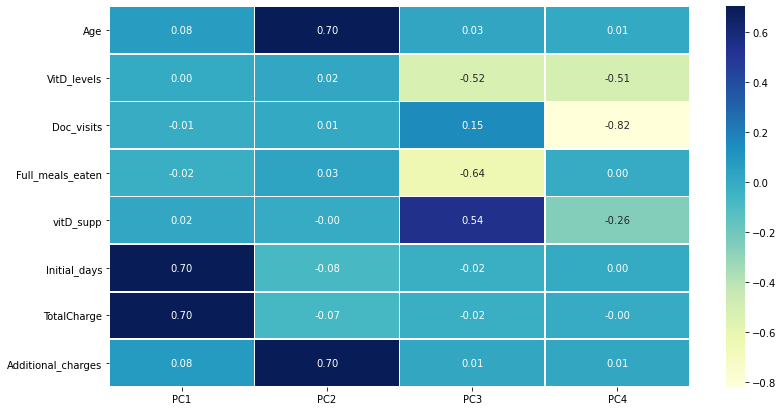

In [40]:
#Visualize loadings https://towardsdatascience.com/principal-component-analysis-algorithm-in-real-life-discovering-patterns-in-a-real-estate-dataset-18134c57ffe7
fig, ax = plt.subplots(figsize=(13, 7))
sns.heatmap(loadings_4, cmap='YlGnBu', linewidths=.7, annot=True, fmt='.2f')
plt.show()

### Part V: Attachments

#### E.  Record the web sources used to acquire data or segments of third-party code to support the analysis. Ensure the web sources are reliable.

https://cgp-oex.wgu.edu/courses/course-v1:WGUx+OEX0026+v02/courseware/1f468770545f494fa657b4dc0ed3762f/2b5f23c5dad64357b352728993788677/6?activate_block_id=block-v1%3AWGUx%2BOEX0026%2Bv02%2Btype%40vertical%2Bblock%403f0422d47d8b4a3eaec25de3bced8bf8

https://towardsdatascience.com/principal-component-analysis-algorithm-in-real-life-discovering-patterns-in-a-real-estate-dataset-18134c57ffe7

#### F.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.

Avcontentteam. 2020. PCA: A Practical Guide to Principal Component Analysis in R & Python.
https://www.analyticsvidhya.com/blog/2016/03/pca-practical-guide-principal-component-analysis-python/

Bento, Carolina. 2020. Principal Component Analysis algorithm in Real-Life: Discovering patterns in a real-estate dataset.
https://towardsdatascience.com/principal-component-analysis-algorithm-in-real-life-discovering-patterns-in-a-real-estate-dataset-18134c57ffe7

Bruce, Peter, et al. Practical Statistics for Data Scientists : 50+ Essential Concepts Using R and Python, O'Reilly Media, Incorporated, 2020. ProQuest Ebook Central, http://ebookcentral.proquest.com/lib/westerngovernors-ebooks/detail.action?docID=6173908.

Li, Lorraine. 2019. Principal Component Analysis for Dimensionality Reduction.
https://towardsdatascience.com/principal-component-analysis-for-dimensionality-reduction-115a3d157bad